# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Modelos lineales de regresión

# Referencias:

Las propiedades y supuestos detrás del Modelo Lineal de Regresión, la pueden encontrar en [Greene, "Econometric Analysis"](http://pages.stern.nyu.edu/~wgreene/Text/econometricanalysis.htm).

También véanse los capítulos 3 y 6 de [ISL](http://www-bcf.usc.edu/~gareth/ISL/getbook.html).

O el capítulo 3 de [ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn/)

# Mínimos Cuadrados Ordinarios (OLS)

* Sean $y_{N \times 1}$, y $X_{N\times (p+1)}$ las variables dependiente y matriz de regresores, respectivamente, donde $X$ incluye $p$ regresores y un vector de unos.


* El modelo lineal es 

$$
\begin{eqnarray}
y &=& X\beta + \epsilon\\
\end{eqnarray}
$$


* El estimador de OLS es el vector $\hat{\beta}$ que minimiza la *suma de residuos al cuadrado* (SSR):

$$
\min_{\beta} SSR(\beta) = (y-X\beta)'(y-X\beta)
$$


* La solución se encuentra fácilmente:
$$
\hat{\beta} = (X'X)^{-1}X'y
$$

y la matriz de varianzas y covarianzas es:

$$
\Sigma_{\beta} = \hat{\sigma}^2(X'X)^{-1}
$$

donde $\hat{\sigma}^2$ es la varianza residual estimada.

# Algunas propiedades del estimador de OLS

*  **Prop 1: El estimador OLS es insesgado**:

$$
E(\hat{\beta}) = \beta
$$

(qué supuestos hay que hacer para probarlo?)

*  **Prop 2: Teorema de Gauss-Markov**:
> El estimador OLS es el estimador de menor varianza, dentro de la clase de estimadores lineales insesgados.

*  **Prop 3: Los residuos estimados son ortogonales a la matriz de regresores:**

$$
X'e = 0
$$

(¿por qué?)



# Propiedades (cont)


*  **Prop 4: Teorema de Frisch-Waugh-Lovell**

> En una regresión con dos variables $y = \alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \epsilon$, el estimador del coeficiente $\alpha_i$ se puede obtener en un proceso de dos etapas:

> **Etapa 1**: Obtenga los residuos de una regresión de $y$ sobre $x_{-i}$, $r_{y,-i}$, y de una regresión de $x_i$ sobre $x_{-i}$, $r_{x_i, -i}$

> **Etapa 2**: en la regresión $r_{y,-i} =  \eta_0 + \eta_1 r_{x_i, -i}$, el estimador OLS 
$$\hat{\eta}_1 = \hat{\alpha}_i$$

El Teorema de FWL es más general que en este caso de dos variables (ver Greene, por ejemplo), y es muy útil para entender qué sucede en OLS: cada coeficiente estimado es el efecto *neto* de los otros efectos.  Este proceso de *neteo* o *partialling out*, limpia la estimación de cualquier efecto compartido


# Primera versión de un algoritmo de Backfitting

* El Teorema de FWL nos dice que cada coeficiente se obtiene limpiando $y$ y $x_k$ de los demás regresores $x_{-k}$, y haciendo una regresión entre los residuales correspondientes.


* En la práctica uno no desea hacer esto: para cada coeficiente $\beta_k$ hay que hacer 3 regresiones!


* Pero nos agudiza la intuición.


* Además nos permite introducir una primera versión de un algoritmo de **backfitting** que tiene varias ventajas:

    1. Sirve para entender el algoritmo de backfitting que vamos a utilizar más adelante para estimar modelos aditivos generalizados (Generalized Additive Models, o GAMs).
    
    2. Tiene varios parecidos con algoritmos que no vamos a ver en este curso como el *Gibbs Sampler* utilizado en estadística bayesiana, y el *EM* o *expectation-maximization*.
    
    3. Incluso cuando $p>>N$, podemos estimar los coeficientes, es decir, incluso cuando tenemos más variables explicativas que obsevaciones, porque utiliza regresiones bivariadas únicamente.
    
* El pseudocódigo sigue a continuación, y en la tarea tendrán que mostrar que funciona.

# Pseudocódigo del algoritmo de backfitting para OLS

```
Inicialícese: beta_0 = 0
Inicialícese la distancia: dist = 1

while dist>0.001:
    # En cada iteracción se hacen P+1 regresión bivariadas:
    for k in range(nvars):
        # seleccionemos las P columnas excluyendo la k-ésima
        ind_col = cols/k
        xmat_k = x[ind_col]
        beta_k = beta_actual[ind_col]
        # limpiemos y de los efectos de estas P variables seleccionadas
        y_k = y - xmat_k*beta_k
        # La actual columna es
        x_k = x[k]
        # regresión entre y_k y x_k, y actualizamos este coeficiente:
        beta_actual[k] = ols(y_k, x_k)
    # Actualícese la distancia:
    dist = dist(beta_actual,beta_anterior)
```

# Variables Dummy y No Linealidad:

* Consideremos un modelo con una variable dummy como regresor:

$$
y_i  = \alpha + \beta D_i + \epsilon_i
$$

con $D_i = 1$ si individuo $i$ pertenece al grupo, y $D_i = 0$ si no pertenece.


* Es inmediato mostrar que:

$$
\beta = E(y_i|D_i = 1) - E(y_i|D_i = 0)
$$

así que la contraparte muestral es 

$$
\hat{\beta} = \overline{y}_1 - \overline{y}_0 
$$
donde $\overline{y}_i = \frac{1}{N_i}\sum_{i \in \{1,0\}} y_i $, y $N_i$ el número de observaciones en el grupo $i$.



# Las variables dummies nos permiten modelar relaciones no lineales

* Por ejemplo, supongamos que queremos modelar la rentabilidad de un cliente en función de su antigüedad.

* Qué alternativas tenemos?

    1. **Modelo lineal**: 
    $$
    r_i = \alpha_0 + \alpha_1 a_i + \epsilon_i
    $$

    2. **Modelo cuadrático**: 
    $$
    r_i = \alpha_0 + \alpha_1 a_i + \alpha_2 a_i^2 +\epsilon_i
    $$

    3. **Modelo polinomial de orden $K$**: 
    $$
    r_i = \sum_{k=0}^K \alpha_k a_i^k +\epsilon_i
    $$


* Alternativamente, podemos dividir el rango de antigüedad and percentiles 
$$
r_i = \sum_{q= 0}^Q \alpha_q D_{qi} + \epsilon_i
$$
con 
$$
D_{qi} = 
\begin{cases}
1 & \text{si $a_i \in [p_{q-1}(a), p_q(a)]$}\\
0 & \text{en otro caso}
\end{cases}
$$

* Si hacemos un grid de percentiles lo suficientemente denso, podremos aproximar cualquier función, así que este método es muy flexible.

# Expansiones polinomiales:

* Como vimos en la diapositiva anterior, un método no paramétrico consiste en aproximar la función $f(X)$ por medio de una expansión por polinomios.


* Por ejemplo, si tenemos tres variables $x_1, x_2, x_3$, una expansión polinomial posible es:

$$
y = \alpha_0 + \sum_{k=1}^3 \beta_k x_k + \sum_{k=1}^3 \theta_k x_k^2 + \sum_{i\neq j} \eta_{ij} x_i x_j + \epsilon_i
$$


* La aproximación puede utilizar polinomios e interacciones de distintos órdenes, y los parámetros se pueden estimar por OLS sin problema, mientras que el número de términos incluido sea menor que el número de observaciones $N>p$.

# Selección de variables


* En general no sabemos cuáles variables deben ir incluidas en un análisis, y este problema puede ser importante cuando tenemos muchos regresores $p$.


* Hay varios métodos de selección de variables que permiten:

    1. **Mejorar la predicción:** por ejemplo, porque un estimador tiene poco sesgo pero mucha varianza.
    
    2. **Facilitar la interpretación:** al eliminar ciertas variables podemos concentrarnos únicamente en las más importantes.
    
 
* Hay tres familias de métodos que se pueden utilizar:

    1. Selección de subconjuntos de variables
    
    2. Regularización o reducción de la magnitud de los coeficientes o *shrinkage*
    
    3. Reducción de dimensionalidad




# Selección de subconjuntos: *Best Subset Selection*

* Si tenemos $p$ regresores, queremos estimar las $\binom{p}{k}$ posibles combinaciones de subconjuntos de $k$ variables.


* Es un método exhaustivo que puede ser computacionalmente ineficientes cuando $p$ es grande.


* Veamos cómo funciona este método utilizando los datos de tarjeta de crédito que están disponibles en la página de [ISL](http://www-bcf.usc.edu/~gareth/ISL/data.html).


* Los datos incluyen el saldo en tarjeta de crédito (balance), el ingreso (Income) y límite de crédito  (Limit), score crediticio (Rating), número de tarjetas (Cards), edad, educación, género, variable indicadora del estatus de estudiante del cliente, casado, y etnicidad, para 400 clientes.

* Queremos estimar el efecto que tienen estos regresores sobre el saldo o balance de cada cliente.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('datasets/Credit.csv')
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [48]:
# primero organicemos los datos: las variables cuantitativas están bien.  Las cualitativas toca transformarlas
N = data.shape[0]
dum_hombre     = np.asarray(data.Gender == ' Male').reshape((N,1))
dum_estudiante = np.asarray(data.Student == 'Yes').reshape((N,1))
dum_casado     = np.asarray(data.Married == 'Yes').reshape((N,1))
# Para etnicidad debemos excluir una variable que sirva como referencia:
# tenemos tres categorías: vamos a excluir la tercera: "African American"
print data.Ethnicity.unique()
dum_ethnic = np.asarray(pd.get_dummies(data.Ethnicity).iloc[:,:-1])
# incluyamos todas las variables:
prexmat = np.concatenate((np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                          dum_hombre, dum_estudiante, dum_casado, dum_ethnic
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
print prexmat.shape
# revisemos que todo quedó bien:
pd.DataFrame(prexmat).mean()

['Caucasian' 'Asian' 'African American']
(400, 10)


0      45.218885
1    4735.600000
2       2.957500
3      55.667500
4      13.450000
5       0.482500
6       0.100000
7       0.612500
8       0.247500
9       0.255000
dtype: float64

In [70]:
# Para las posibles combinaciones vamos a usar el módulo itertools
from itertools import combinations
import sys
sys.path.append('/Users/danielvaughan/Documents/Python Scripts')
import olsdan as ols

# probémoslo con conjuntos de 9 elementos
list(combinations(np.arange(10),9))

# vamos a guardar los resultados en un array, pero no se cuántas filas tenemos
res_arr = np.zeros((1,2))
res_arr[:,:] = np.nan
for k in range(1,11):
    # la siguiente es la lista de todos los regresores posibles
    list_subsets = list(combinations(np.arange(10),k))
    # tenemos que hacer un loop sobre todas estas posibilidades:
    for s in range(len(list_subsets)):
        # los regresores seleccionados:
        ind_s = np.array(list_subsets[s])
        xmat_subset = prexmat[:,ind_s]
        # listos para estimar: pero incluyamos constante
        olssk = ols.ols_dan(saldo, np.concatenate((np.ones((N,1)),xmat_subset),axis=1))
        # guardemos los resultados: queremos: número de regresores, ssr
        prelist = np.array([k, olssk.ssr()]).reshape((1,2))
        # listos para anexar:
        res_arr = np.concatenate((res_arr, prelist),axis=0)
print res_arr.shape

(1024, 2)


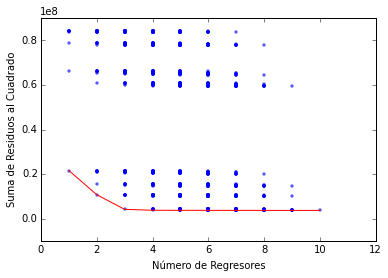

In [69]:
# Ya tenemos todos los modelos:
# Hagamos un gráfico:
plt.scatter(res_arr[:,0],res_arr[:,1], s=6, color='b',alpha=0.5)
plt.ylabel('Suma de Residuos al Cuadrado')
plt.xlabel(u'Número de Regresores')
# Encontremos la frontera: como en el libro:
res_arr_df = pd.DataFrame(res_arr, columns=['Num_Pred','SSR'])
front_ssr = res_arr_df.SSR.groupby(res_arr_df.Num_Pred).min()
plt.plot(front_ssr.index, front_ssr.values, color='r')                          

# Cómo seleccionamos el mejor modelo?

* Una vez tenemos la frontera, podemos utilizar cuatro opciones para seleccionar:

    1. **Cross-Validation**: minimizar el SSR promedio.
    
    2. Minimizar $C_p$: 
    $$
    C_p = \frac{1}{n}(SSR + 2d\hat{\sigma}_2)
    $$
    donde $d$ es el número de regresores
    3. Minimizar el Criterio de Información de Akaike:
    $$
    AIC = \frac{1}{n\hat{\sigma}^2}(RSS + 2d \hat{\sigma}_2)
    $$
    4. Minimizar el Criterio de Información de Bayesiano:
    $$
    BIC = \frac{1}{n}(RSS + \ln(n)d \hat{\sigma}_2)
    $$
    5. Maximizar el $\overline{R}^2$